# Performance Analysis: O0 vs O2 Optimization

This notebook analyzes the performance differences between O0 (no optimization) and O2 (optimization level 2) compilation flags.

## Import Required Libraries

In [4]:
import matplotlib.pyplot as plt
import numpy as np

## Read and Parse Data Files

In [5]:
def read_results_file(filename):
    """
    Reads a results file and parses the data.
    
    Args:
        filename: Path to the results file
    
    Returns:
        Tuple of lists: (stride, sum, time, rate)
    """
    stride_list = []
    sum_list = []
    time_list = []
    rate_list = []
    
    with open(filename, 'r', encoding='utf-8') as f:
        # Skip header line
        next(f)
        
        # Read data lines
        for line in f:
            # Remove all types of whitespace and non-breaking spaces
            line = line.replace('\u00a0', ' ').replace('\u2423', ' ')
            # Split by comma and strip all whitespace
            parts = [part.strip() for part in line.split(',')]
            if len(parts) == 4:
                try:
                    stride_list.append(int(parts[0]))
                    sum_list.append(float(parts[1]))
                    time_list.append(float(parts[2]))
                    rate_list.append(float(parts[3]))
                except ValueError as e:
                    # If conversion fails, try removing any remaining special characters
                    parts = [part.encode('ascii', 'ignore').decode('ascii').strip() for part in parts]
                    stride_list.append(int(parts[0]))
                    sum_list.append(float(parts[1]))
                    time_list.append(float(parts[2]))
                    rate_list.append(float(parts[3]))
    
    return stride_list, sum_list, time_list, rate_list


In [6]:
# Read O0 results
stride_O0, sum_O0, time_O0, rate_O0 = read_results_file('results_O0.txt')

# Read O2 results
stride_O2, sum_O2, time_O2, rate_O2 = read_results_file('results_O2.txt')

print(f"O0 data points: {len(stride_O0)}")
print(f"O2 data points: {len(stride_O2)}")

O0 data points: 20
O2 data points: 20


## Plot 1: CPU Time vs Stride

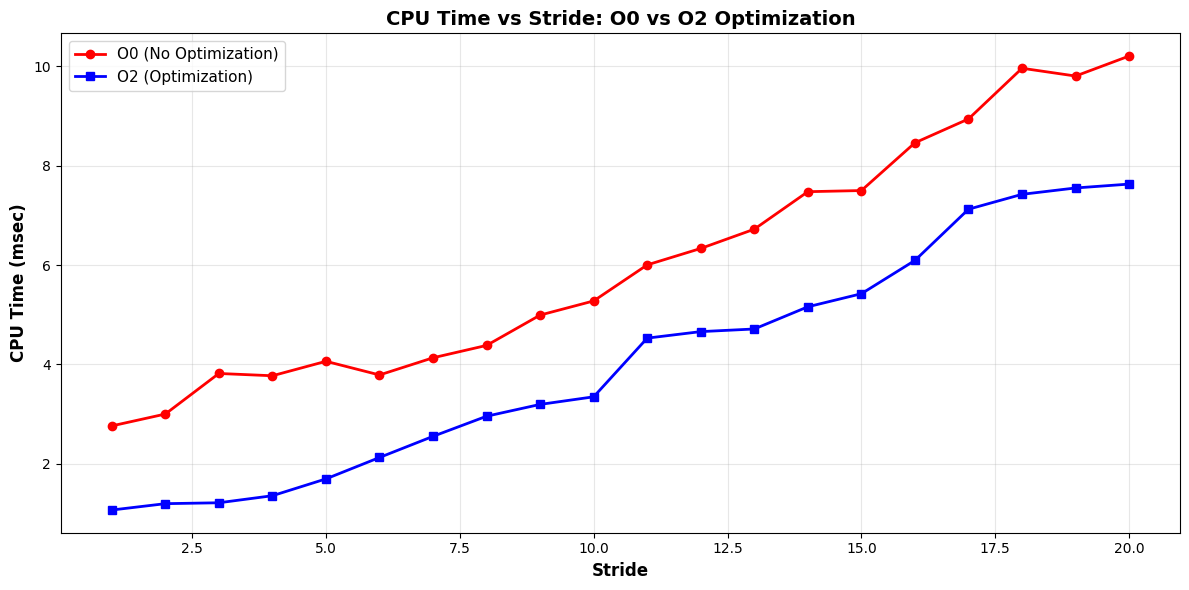

In [7]:
plt.figure(figsize=(12, 6))

plt.plot(stride_O0, time_O0, marker='o', linestyle='-', linewidth=2, markersize=6, label='O0 (No Optimization)', color='red')
plt.plot(stride_O2, time_O2, marker='s', linestyle='-', linewidth=2, markersize=6, label='O2 (Optimization)', color='blue')

plt.xlabel('Stride', fontsize=12, fontweight='bold')
plt.ylabel('CPU Time (msec)', fontsize=12, fontweight='bold')
plt.title('CPU Time vs Stride: O0 vs O2 Optimization', fontsize=14, fontweight='bold')
plt.legend(fontsize=11, loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()

## Plot 2: Bandwidth vs Stride

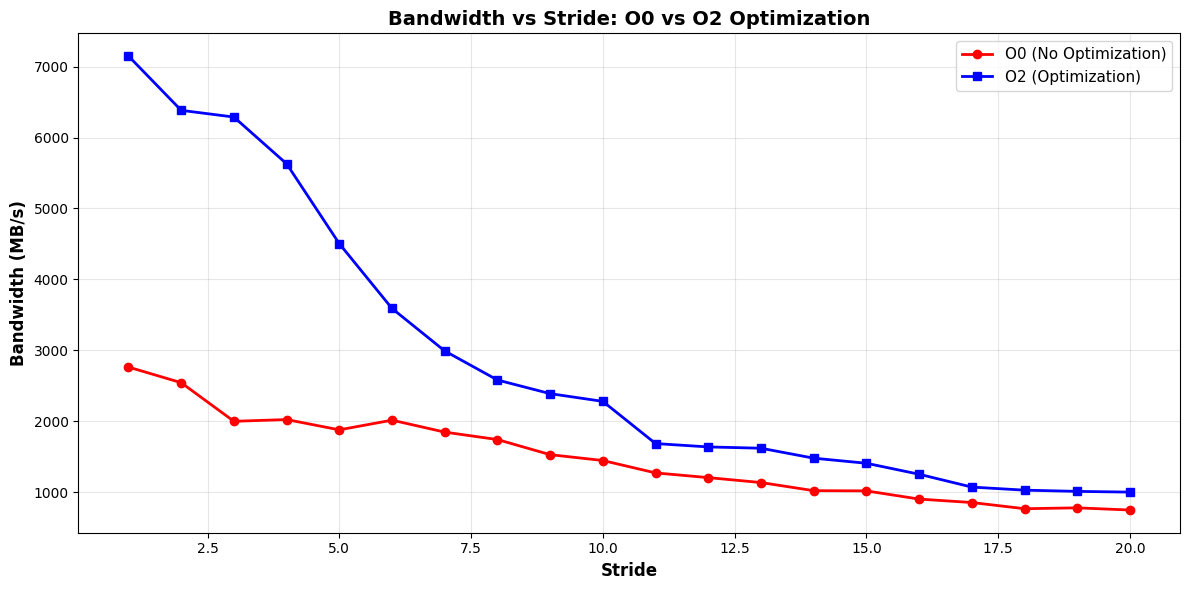

In [8]:
plt.figure(figsize=(12, 6))

plt.plot(stride_O0, rate_O0, marker='o', linestyle='-', linewidth=2, markersize=6, label='O0 (No Optimization)', color='red')
plt.plot(stride_O2, rate_O2, marker='s', linestyle='-', linewidth=2, markersize=6, label='O2 (Optimization)', color='blue')

plt.xlabel('Stride', fontsize=12, fontweight='bold')
plt.ylabel('Bandwidth (MB/s)', fontsize=12, fontweight='bold')
plt.title('Bandwidth vs Stride: O0 vs O2 Optimization', fontsize=14, fontweight='bold')
plt.legend(fontsize=11, loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()

## Combined View: Both Plots Side by Side

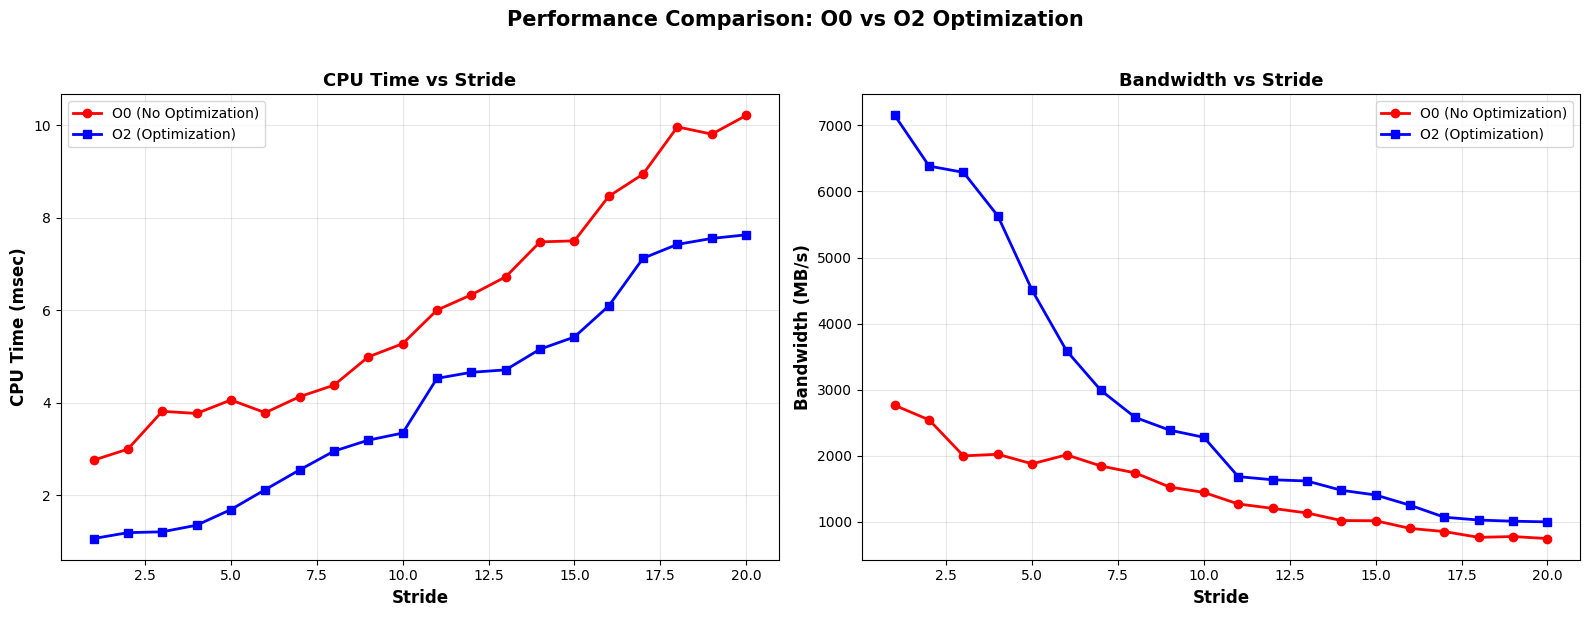

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: CPU Time
ax1.plot(stride_O0, time_O0, marker='o', linestyle='-', linewidth=2, markersize=6, label='O0 (No Optimization)', color='red')
ax1.plot(stride_O2, time_O2, marker='s', linestyle='-', linewidth=2, markersize=6, label='O2 (Optimization)', color='blue')
ax1.set_xlabel('Stride', fontsize=12, fontweight='bold')
ax1.set_ylabel('CPU Time (msec)', fontsize=12, fontweight='bold')
ax1.set_title('CPU Time vs Stride', fontsize=13, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Plot 2: Bandwidth
ax2.plot(stride_O0, rate_O0, marker='o', linestyle='-', linewidth=2, markersize=6, label='O0 (No Optimization)', color='red')
ax2.plot(stride_O2, rate_O2, marker='s', linestyle='-', linewidth=2, markersize=6, label='O2 (Optimization)', color='blue')
ax2.set_xlabel('Stride', fontsize=12, fontweight='bold')
ax2.set_ylabel('Bandwidth (MB/s)', fontsize=12, fontweight='bold')
ax2.set_title('Bandwidth vs Stride', fontsize=13, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

fig.suptitle('Performance Comparison: O0 vs O2 Optimization', fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## Performance Summary Statistics

In [10]:
print("=" * 60)
print("PERFORMANCE SUMMARY")
print("=" * 60)

print("\nO0 (No Optimization):")
print(f"  Average CPU Time: {np.mean(time_O0):.3f} msec")
print(f"  Average Bandwidth: {np.mean(rate_O0):.3f} MB/s")
print(f"  Min CPU Time: {np.min(time_O0):.3f} msec (stride={stride_O0[np.argmin(time_O0)]})")
print(f"  Max Bandwidth: {np.max(rate_O0):.3f} MB/s (stride={stride_O0[np.argmax(rate_O0)]})")

print("\nO2 (Optimization):")
print(f"  Average CPU Time: {np.mean(time_O2):.3f} msec")
print(f"  Average Bandwidth: {np.mean(rate_O2):.3f} MB/s")
print(f"  Min CPU Time: {np.min(time_O2):.3f} msec (stride={stride_O2[np.argmin(time_O2)]})")
print(f"  Max Bandwidth: {np.max(rate_O2):.3f} MB/s (stride={stride_O2[np.argmax(rate_O2)]})")

print("\nPerformance Improvement (O2 vs O0):")
avg_time_improvement = ((np.mean(time_O0) - np.mean(time_O2)) / np.mean(time_O0)) * 100
avg_rate_improvement = ((np.mean(rate_O2) - np.mean(rate_O0)) / np.mean(rate_O0)) * 100
print(f"  CPU Time Reduction: {avg_time_improvement:.2f}%")
print(f"  Bandwidth Increase: {avg_rate_improvement:.2f}%")
print("=" * 60)

PERFORMANCE SUMMARY

O0 (No Optimization):
  Average CPU Time: 6.071 msec
  Average Bandwidth: 1473.727 MB/s
  Min CPU Time: 2.761 msec (stride=1)
  Max Bandwidth: 2763.272 MB/s (stride=1)

O2 (Optimization):
  Average CPU Time: 4.051 msec
  Average Bandwidth: 2848.756 MB/s
  Min CPU Time: 1.067 msec (stride=1)
  Max Bandwidth: 7150.323 MB/s (stride=1)

Performance Improvement (O2 vs O0):
  CPU Time Reduction: 33.28%
  Bandwidth Increase: 93.30%
